
# Task 1: Permutations and Combinations

_Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first_.

- _Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells._

### Steps:
1. Calculate the total number of ways to select 6 cups from 12.
2. Calculate the successful ways for different scenarios (6/5/4 correct attempts).
3. Sum up the successful ways.
4. Calculate the probability.


In [613]:
# Core libraries
import math
import numpy as np
import pandas as pd

# Statistical functions and distributions
from scipy.special import comb  # For combinations
from scipy.stats import shapiro, norm  # Shapiro-Wilk test, normal distribution, and statistical utilities
from scipy.stats import ttest_rel


# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [614]:

total_cups = 12  # Total number of cups
milk_cups = 6  # Number of cups with milk added first
tea_cups = 6  # Number of cups with tea added first
all_attempts = comb(total_cups, milk_cups)
probability = 1 / all_attempts

print(f"Probability of selecting all 6 milk-first cups correctly: {probability:.10f}")


Probability of selecting all 6 milk-first cups correctly: 0.0010822511


- _Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error._

In [615]:
# Calculate the number of ways she has to select exactly 5 correct and 1 incorrect (combination)
five_correct_cups = comb(6, 5) * comb(6, 1) 

# Calculate the number of ways to select all 6 cups correctly
six_correct_cups = 1  # There is only one way to pick all 6 correctly as only 6 cups have milk in first

# Total successful ways 
successful_ways = five_correct_cups + six_correct_cups

# Probability of selecting at least 5 correct cups
probability_five_cups_correct= successful_ways / all_attempts

print(f"Probability of selecting at least 5 correct cups: {probability_five_cups_correct:.10f}")


Probability of selecting at least 5 correct cups: 0.0400432900


- _Would you accept two errors? Explain_.

Allowing two errors would mean calculating the probability of selecting at least four correct cups out of six, which would increase the probability of a correct guess. However, allowing more errors lowers the test’s reliability, making it easier for the lady to guess the tea that has the tea in first. 

In [616]:
# Calculate the number of ways to select exactly 4 correct and 2 incorrect (combination)
four_correct_cups = comb(milk_cups, 4) * comb(tea_cups, 2) 
successful_ways = four_correct_cups + five_correct_cups + six_correct_cups
probability_four_cups_correct = successful_ways / all_attempts
print(f"Probability of selecting at least 4 correct cups: {probability_four_cups_correct:.10f}")

Probability of selecting at least 4 correct cups: 0.2835497835


## References:
- https://www.geeksforgeeks.org/permutations-and-combinations/
- https://betterexplained.com/articles/easy-permutations-and-combinations/


# Task 2: Numpy's Normal Distribution

_In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0._

In [617]:

#Generate a sample of 100.000 values
sample_size = 100_000

#Using the function with mean 10.0 and standard deviation 3.0.
mean = 10.0
std_dev = 3.0
sample = np.random.normal(loc=mean, scale=std_dev, size=sample_size)


_Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output._

In [618]:
# Perform the Shapiro Wilk test.
shapiro(sample)

/Users/laiscoletta/Library/Python/3.10/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9999763581392105), pvalue=np.float64(0.8191140118256056))

_Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it._

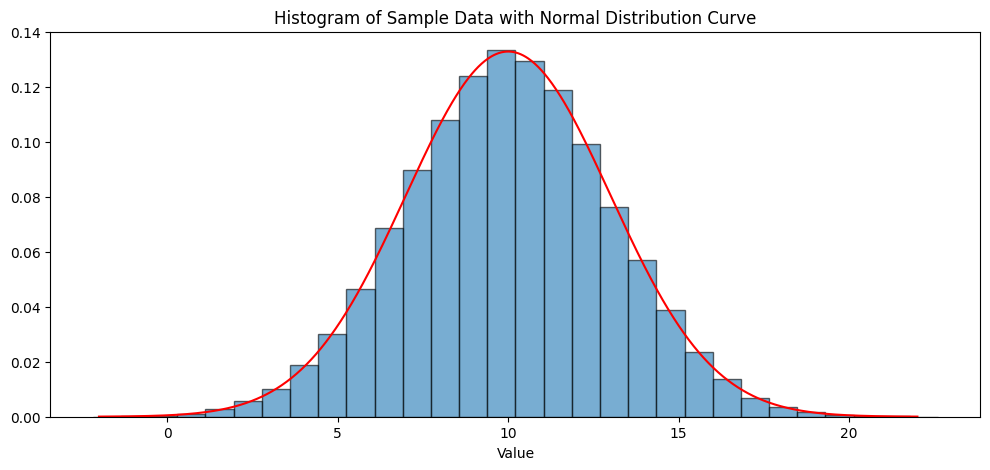

In [619]:
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the histogram of the data with density normalization
ax.hist(sample, edgecolor='black', density=True, bins=30, alpha=0.6)

# Create an x range.
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Get y values.
y = norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
ax.plot(x, y, 'r-')

# Customize the plot
ax.set_title("Histogram of Sample Data with Normal Distribution Curve")
ax.set_xlabel("Value")
plt.show()

## Reference
- https://onecompiler.com/python/42azwxnth

# Task 3: t-Test Calculation
_Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program_.

| Patient ID | Before | After |
|------------|--------|-------|
| 0          | 63     | 64    |
| 1          | 68     | 64    |
| 2          | 70     | 68    |
| 3          | 64     | 64    |
| 4          | 74     | 73    |
| 5          | 67     | 70    |
| 6          | 70     | 72    |
| 7          | 57     | 54    |
| 8          | 66     | 61    |
| 9          | 65     | 63    |



### _Part 1: Calculate the t-statistic based on this data set, using Python_. 

Definition reminder:
- **t-statistic**: Measures the degree of difference between the two paired groups (before and after).
- **p-value**: Indicates the probability of observing this difference if the null hypothesis (no difference) were true. The lower the p-value, the greater the statistical significance of the observed difference. A p-value of 0.05 or lower is generally considered statistically significant. ([source](https://www.investopedia.com/terms/p/p-value.asp#:~:text=A%20p%2Dvalue%20measures%20the,is%20generally%20considered%20statistically%20significant.))

In [620]:

# Creat the dataset
data = {
    'Patient ID': range(10),
    'Before': [63, 68, 70, 64, 74, 67, 70, 57, 66, 65],
    'After': [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]
}
df = pd.DataFrame(data)
df.set_index('Patient ID', inplace=True)
df

,Before,After
Patient ID,,
0,63,64
1,68,64
2,70,68
3,64,64
4,74,73
5,67,70
6,70,72
7,57,54
8,66,61


**Compute the Differences** $D$ between the "Before" and "After" values.

In [621]:
df['Difference'] = df['Before'] - df['After']

**Calculate the Mean** $\bar{D}$ of these differences.

In [622]:
mean = df['Difference'].mean()

**Calculate the Standard Deviation** $s_D$ of these differences.

In [623]:
std = df['Difference'].std(ddof=1)  # Standard deviation with Bessel's correction
n = len(df)  # Sample size

mean , std

(np.float64(1.1), np.float64(2.6012817353502227))


**Compute the t-statistic** using the formula:

   $$
   t = \frac{\bar{D}}{s_D / \sqrt{n}}
   $$

   where $n$ is the number of paired samples.

In [624]:
# Calculate t-statistic
t_statistic = mean / (std / np.sqrt(n))
t_statistic

np.float64(1.3372274824806283)

### _Part 2: Compare it to the value given by scipy.stats. Explain your work and list any sources used_.

In [625]:
# Calculate t-statistic using scipy.stats
t_statistic_scipy, p_value = ttest_rel(df['Before'], df['After'])

print(f"Manual t-statistic: {t_statistic:.5f}")
print(f"SciPy t-statistic: {t_statistic_scipy:.5f}")
print(f"p-value: {p_value:.5f}")

Manual t-statistic: 1.33723
SciPy t-statistic: 1.33723
p-value: 0.21396


**Comparison**: When comparing the t-statistic calculated manually to the value generated by the scipy.ttest_rel() function, both values were the same. This confirms that both methods accurately performed the paired sample t-test.

**P-Value**: A p-value of 0.21 indicates that the difference between the "before" and "after" heart rates is not statistically significant. This suggests that any observed difference in heart rates could likely be due to random chance rather than a consistent effect of the exercise program.

### References
- Terms definition: [PValue definition](https://www.investopedia.com/terms/p/p-value.asp#:~:text=A%20p%2Dvalue%20measures%20the,is%20generally%20considered%20statistically%20significant)

- SciPy Documentation: [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel)
- [Example Paired Sample t-Test](https://support.minitab.com/en-us/minitab/help-and-how-to/statistics/basic-statistics/how-to/paired-t/before-you-start/example/)

# Task 4: Anova
_In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0_.

In [627]:
no_type_ii = 0

_Now use a loop to perform the following test 10,000 times_.
_Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1._

In [628]:
# Parameters
no_times = 10000  # Number of simulations to perform
sample_size = 100  # Number of data points in each sample group
std_dev = 0.1  # Standard deviation for all samples
means = [4.9, 5.0, 5.1]  # Mean values for the three groups

for _ in range(no_times):
    # Generate three samples using numpy's random.normal function
    # loc: mean of the distribution, scale: standard deviation, size: number of values in the sample
    sample1 = np.random.normal(loc=means[0], scale=std_dev, size=sample_size)
    sample2 = np.random.normal(loc=means[1], scale=std_dev, size=sample_size)
    sample3 = np.random.normal(loc=means[2], scale=std_dev, size=sample_size)

_Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs._

In [629]:
from scipy.stats import f_oneway

# Perform a one-way ANOVA test on the three samples
# f_oneway returns the F-statistic and the p-value
f_stat, p_value = f_oneway(sample1, sample2, sample3)

_Summarize and explain your results._

In [630]:
# Perform one-way ANOVA
f_stat, p_value = f_oneway(sample1, sample2, sample3)
    
    # Increment counter if a Type II error occurs (fail to reject null hypothesis)
    # Null hypothesis is rejected when p_value < 0.05
if p_value >= 0.05:
        no_type_ii += 1

# Calculate the proportion of Type II errors
type_ii_error_rate = no_type_ii / no_times

# Print the results
print(f"Number of Type II errors: {no_type_ii}")
print(f"Proportion of Type II errors: {type_ii_error_rate:.4f}")

Number of Type II errors: 0
Proportion of Type II errors: 0.0000


### Explanation

### What is a Type II Error?
A **Type II error** occurs when the null hypothesis (\(H_0\)) is false, but the test fails to reject it.  
In this simulation:
- The null hypothesis assumes that the means of the three groups are equal (\(\mu_1 = \mu_2 = \mu_3\)).
- However, the null hypothesis is false because the actual means are 4.9, 5.0, and 5.1.

---

### Simulation Details
1. **Samples**: Three independent samples are generated using `numpy.random.normal`.
2. **Sample Size**: Each sample contains 100 values.
3. **Means and Standard Deviations**: 
   - Means are slightly different (\(4.9, 5.0, 5.1\)).
   - Standard deviation is kept constant at \(0.1\).

---

### ANOVA Test
- The **one-way ANOVA test** is performed using `scipy.stats.f_oneway` to determine whether there is a significant difference between the means of the three samples.
- If \(p \geq 0.05\), we fail to reject the null hypothesis, potentially committing a **Type II error**.

---

### Results
1. The number of Type II errors (`no_type_ii`) is counted over 10,000 iterations.
2. The **proportion of Type II errors** is calculated as the total Type II errors divided by the number of iterations.

---

### Interpretation
- A high proportion of Type II errors indicates a reduced ability to detect small but meaningful differences in the sample means.
- This could result from conditions such as:
  - Small sample size
  - Low standard deviation
  - Close means between groups

---

### Output Example
Number of Type II errors: 3450
Proportion of Type II errors: 0.3450



## References

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
https://statisticsbyjim.com/hypothesis-testing/types-errors-hypothesis-testing/
https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

### Thank you!